# **NoteBook 02**
*   Name: C N S Peiris
*   UOWno: W2054006
*   IIT no: 20232308
*   Reviewer: Pahandi Samarasinghe






Codereuse Session 02 (Week 07) Question 01, 07, 09, 24

In [ ]:
# Data manipulation and numerical operations
import pandas as pd  # For dataframes and data analysis
import numpy as np   # For numerical computations

# Model selection and preprocessing
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import MinMaxScaler       # Feature scaling
from sklearn.model_selection import GridSearchCV     # Hyperparameter tuning

# Machine learning models
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier   # KNN classifier
from sklearn.naive_bayes import GaussianNB           # Naive Bayes classifier
from sklearn.metrics import accuracy_score

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,        # Confusion matrix calculation
    classification_report,   # Precision/recall/f1 metrics
    ConfusionMatrixDisplay,  # Visualize confusion matrix
    RocCurveDisplay,         # Visualize ROC curves
    accuracy_score           # Calculate accuracy
)

Codereuse Session 02 (Week 07) Question 02

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/BrestCancer/cleaned_classification_data.csv')

Codereuse Session 02 (Week 07) Question 04

In [ ]:
# Show dataframe info including dtypes and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4018 non-null   int64
 1   T_Stage                 4018 non-null   int64
 2   N_Stage                 4018 non-null   int64
 3   6th_Stage               4018 non-null   int64
 4   Differentiated          4018 non-null   int64
 5   Grade                   4018 non-null   int64
 6   A_Stage                 4018 non-null   int64
 7   Tumor_Size              4018 non-null   int64
 8   Estrogen_Status         4018 non-null   int64
 9   Progesterone_Status     4018 non-null   int64
 10  Regional_Node_Examined  4018 non-null   int64
 11  Regional_Node_Positive  4018 non-null   int64
 12  Survival_Months         4018 non-null   int64
 13  Mortality_Status        4018 non-null   int64
dtypes: int64(14)
memory usage: 439.6 KB


Codereuse Session 01 (Week 05) Question 06

In [ ]:
# Display dataframe dimensions (rows, columns)
df.shape

(4018, 14)

Codereuse Session 02 (Week 07) Question 03

In [ ]:
# Display first 5 rows of dataframe
df.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68,0,0,0,0,3,0,4,1,1,24,1,60,0
1,50,1,1,1,1,2,0,35,1,1,14,5,62,0
2,58,2,2,2,1,2,0,63,1,1,14,7,75,0
3,58,0,0,0,0,3,0,18,1,1,2,1,84,0
4,47,1,0,3,0,3,0,41,1,1,3,1,50,0


Codereuse Session 01 (Week 05) Question 11

In [ ]:
# Count missing values per column
df.isna().sum()

,0
Age,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0
Progesterone_Status,0


Codereuse Session 02 (Week 07) Question 06

In [ ]:
# Select relevant clinical features for modeling
feature_cols = [
    'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
    'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
    'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months'
]
# Create feature matrix (X) and target vector (y)
X = df[feature_cols]
y = df['Mortality_Status']

# Print shapes
print('\n'.join(X.columns))
print("\n")
print("Feature matrix shape:", X.shape)

Age
T_Stage
N_Stage
6th_Stage
Differentiated
Grade
A_Stage
Tumor_Size
Estrogen_Status
Progesterone_Status
Regional_Node_Examined
Regional_Node_Positive
Survival_Months


Feature matrix shape: (4018, 13)


Codereuse Session 02 (Week 07) Question 08

In [ ]:
# Split data into training (80%) and test (20%) sets
# random_state=42 ensures reproducibility
# stratify=y maintains class distribution in splits
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (3214, 13)
Test set shape: (804, 13)


In [ ]:
# For training set
print("\nTraining class distribution:")
train_counts = y_train.value_counts()
train_total = len(y_train)
for label, count in train_counts.items():
    percentage = (count / train_total) * 100
    print(f"{label}\t{count} ({percentage:.1f}%)")

# For test set
print("\nTest class distribution:")
test_counts = y_test.value_counts()
test_total = len(y_test)
for label, count in test_counts.items():
    percentage = (count / test_total) * 100
    print(f"{label}\t{count} ({percentage:.1f}%)")



Training class distribution:
0	2722 (84.7%)
1	492 (15.3%)

Test class distribution:
0	681 (84.7%)
1	123 (15.3%)


## **Logistic** **Regression**

Codereuse Session 02 (Week 07) Question 10

In [ ]:
#Logistic Regression
# Initialize Logistic Regression with increased max iterations

lr = LogisticRegression(max_iter=1000)

Codereuse Session 02 (Week 07) Question 11

In [ ]:
# Train model on training data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Codereuse Session 02 (Week 07) Question 13

In [ ]:
# Make predictions on test set
y_pred_lr = lr.predict(X_test)

Codereuse Session 02 (Week 07) Question 14

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
comparison_df

,Actual,Predicted
3102,1,1
774,1,0
3867,1,0
4007,0,0
2284,0,0
...,...,...
549,0,0
356,0,0
1555,0,0
1072,0,0


Codereuse Session 02 (Week 07) Question 16

In [ ]:
# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred_lr)

print ("the accuracy is: ", accuracy)

the accuracy is:  0.8855721393034826


Codereuse Session 02 (Week 07) Question 18

In [ ]:
# Print classification report
print("="*50)
print("LR Performance:")
print("="*50)
print(classification_report(y_test, y_pred_lr))

LR Performance:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       681
           1       0.70      0.44      0.54       123

    accuracy                           0.89       804
   macro avg       0.80      0.70      0.74       804
weighted avg       0.87      0.89      0.87       804



Codereuse Session 02 (Week 07) Question 17

Logistic Regression Performance:


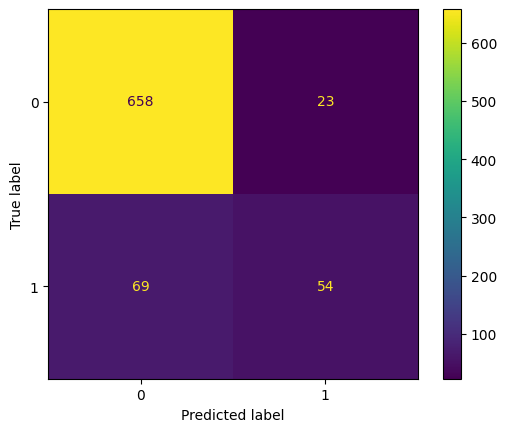

In [ ]:
# 3.1 Logistic Regression
print("="*50)
print("Logistic Regression Performance:")
print("="*50)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr,labels = lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = lr.classes_)
disp.plot()

Codereuse Session 02 (Week 07) Question 19

Logistic Regression Performance:


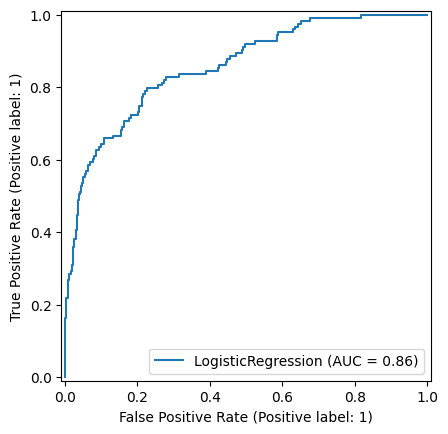

In [ ]:
# Plot ROC curve
# 3.1 Logistic Regression
print("="*50)
print("Logistic Regression Performance:")
print("="*50)
RocCurveDisplay.from_estimator(lr, X_test, y_test)

# **KNK** **NeighborsClassifier**

Codereuse Session 02 (Week 07) Question 21

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=9)

Codereuse Session 02 (Week 07) Question 22

In [ ]:
# Train model on training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

Codereuse Session 02 (Week 07) Question 23

In [ ]:
# predict on testing
y_pred_knn = knn.predict(X_test)

Codereuse Session 02 (Week 07) Question 18

In [ ]:
# KNN classification report
print("="*50)
print("KNN Performance:")
print("="*50)
print(classification_report(y_test, y_pred_knn))



KNN Performance:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       681
           1       0.71      0.40      0.51       123

    accuracy                           0.88       804
   macro avg       0.80      0.68      0.72       804
weighted avg       0.87      0.88      0.87       804



Codereuse Session 02 (Week 07) Question 17

KNN Performance:


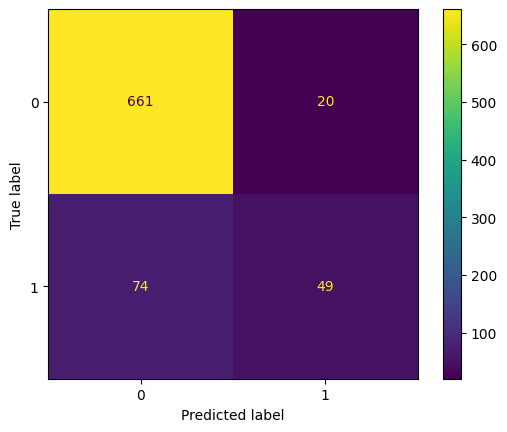

In [ ]:
#KNN confusion Matrix
print("="*50)
print("KNN Performance:")
print("="*50)
cm = confusion_matrix(y_test, y_pred_knn,labels = knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
disp.plot()

Codereuse Session 02 (Week 07) Question 19

KNN Performance:


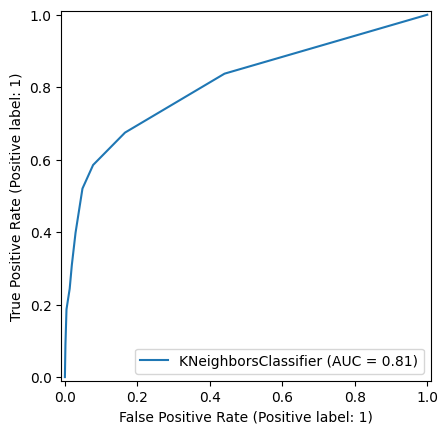

In [ ]:
#KNN AUC
print("="*50)
print("KNN Performance:")
print("="*50)
RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [ ]:
print("NB Accuracy:", accuracy_score(y_test, y_pred_knn))

NB Accuracy: 0.8830845771144279


# **Naive Bayes**

Codereuse Session 02 (Week 07) Question 27

In [ ]:
#Naive Bayes
nb = GaussianNB()
#Train thee nb
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Do prediction
y_pred_nb = nb.predict(X_test)  # Use unscaled test data

Codereuse Session 02 (Week 07) Question 16

In [ ]:
#NB accuracy
print("NB Accuracy:", accuracy_score(y_test, y_pred_nb))

NB Accuracy: 0.8308457711442786


Codereuse Session 02 (Week 07) Question 18

In [ ]:
# NB classification report
print("="*50)
print("Naïve Bayes Performance:")
print("="*50)
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       681
           1       0.45      0.46      0.45       123

    accuracy                           0.83       804
   macro avg       0.67      0.68      0.68       804
weighted avg       0.83      0.83      0.83       804



Codereuse Session 02 (Week 07) Question 17

Naïve Bayes Performance:


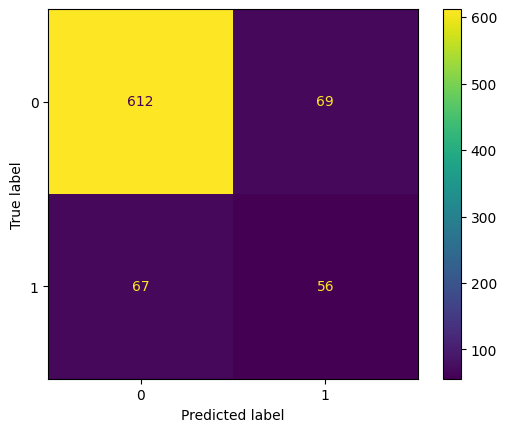

In [ ]:
# Confusion Matrix
print("="*50)
print("Naive Bayes Performance:")
print("="*50)
ensemble_cm = confusion_matrix(y_test, y_pred_nb)
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm)
ensemble_disp.plot()

Codereuse Session 02 (Week 07) Question 19

Naïve Bayes Performance:


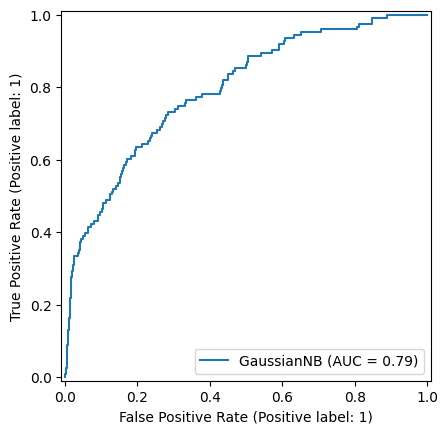

In [ ]:
print("="*50)
print("Naïve Bayes Performance:")
print("="*50)
RocCurveDisplay.from_estimator(nb, X_test, y_test)

# **Logistic Regression Hyperparameter Tuning**

Codereuse Session 02 (Week 07) Question 25

In [ ]:
# Hyperparameter Tuning

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

Codereuse Session 02 (Week 07) Question 25

In [ ]:
#Best parameters for LR
print("Best LR Parameters:", grid_lr.best_params_)

Best LR Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Codereuse Session 02 (Week 07) Question 26

In [ ]:
#Prrediction using LR
y_pred_lr_tuned = grid_lr.predict(X_test)

Codereuse Session 02 (Week 07) Question 16

In [ ]:
#Tuned LR Accuracy
print("LR tuned Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))

LR tuned Accuracy: 0.8855721393034826


Codereuse Session 02 (Week 07) Question 18

In [ ]:
#Tuned LR classficationreport
print("="*50)
print("Tunned LR:")
print("="*50)
print(classification_report(y_test, y_pred_lr_tuned))

Tunned LR:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       681
           1       0.70      0.44      0.54       123

    accuracy                           0.89       804
   macro avg       0.80      0.70      0.74       804
weighted avg       0.87      0.89      0.87       804



Codereuse Session 02 (Week 07) Question 17

In [ ]:
# Confusion Matrix
print("="*50)
print("Tunned LR:")
print("="*50)
ensemble_cm = confusion_matrix(y_test, y_pred_lr_tuned)
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm)
ensemble_disp.plot()

Codereuse Session 02 (Week 07) Question 19

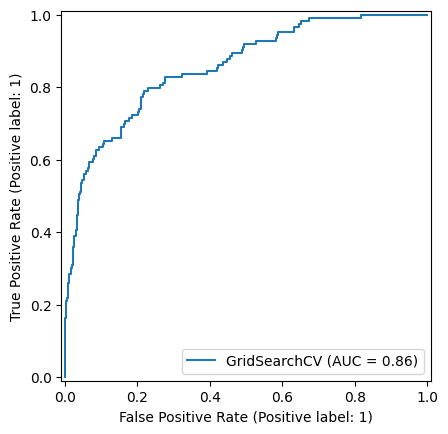

In [ ]:
#AUC LR tuned
RocCurveDisplay.from_estimator(grid_lr, X_test, y_test)